In [1]:
import numpy as np
import matplotlib.pyplot as plt
import util

from linear_model import LinearModel

In [2]:
class LogisticRegression:
    def __init__(self, train_path, valid_path):
        self.train_path = train_path
        self.valid_path = valid_path
        self.X_train, self.y_train = util.load_dataset(self.train_path, add_intercept=True)
        self.X_valid, self.y_valid = util.load_dataset(self.valid_path, add_intercept=True)

        _, n = self.X_train.shape
        self.theta = np.zeros(n)

    
    def plot(self, train, valid):
        if train:
            util.plot(self.X_train, self.y_train, self.theta)

        if valid:
            util.plot(self.X_valid, self.y_valid, self.theta)


    def predict(self, X):
        return 1 / (1 + np.exp(-np.dot(X, self.theta)))
    

    def fit(self, eps, max_iter):
        m, _ = self.X_train.shape

        for _ in range(max_iter):
            theta_old = self.theta.copy()

            # compute the gradient of J(theta)
            gradient_cost = 1/m * (self.X_train.T.dot(self.predict(self.X_train) - self.y_train))
            h_theta_X = np.reshape(self.predict(self.X_train), (-1, 1))
            hessian = 1/m * (self.X_train.T.dot(h_theta_X * (1 - h_theta_X) * self.X_train))
            self.theta -= np.linalg.inv(hessian).dot(gradient_cost)

            if np.linalg.norm(self.theta - theta_old) < eps:
                self.theta = theta_old
                break

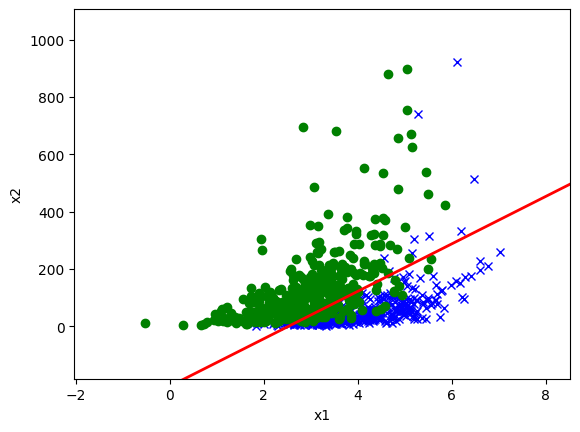

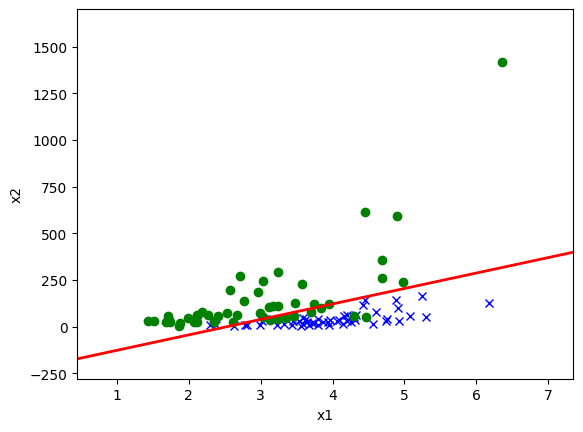

In [3]:
train_path_1 = "../data/ds1_train.csv"
valid_path_1 = "../data/ds1_valid.csv"

lr1 = LogisticRegression(train_path_1, valid_path_1)

eps = int(1e-5)
max_iter = int(1e6)

lr1.fit(eps, max_iter)
lr1.plot(True, True)

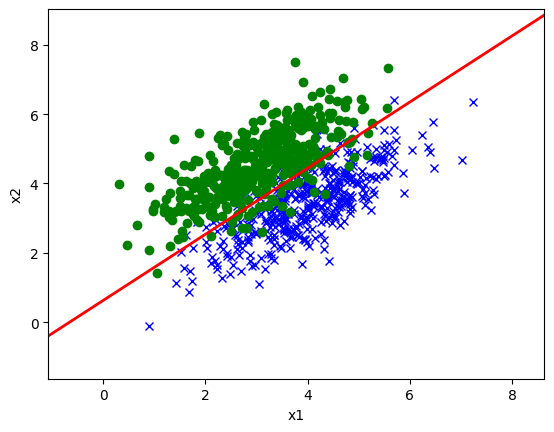

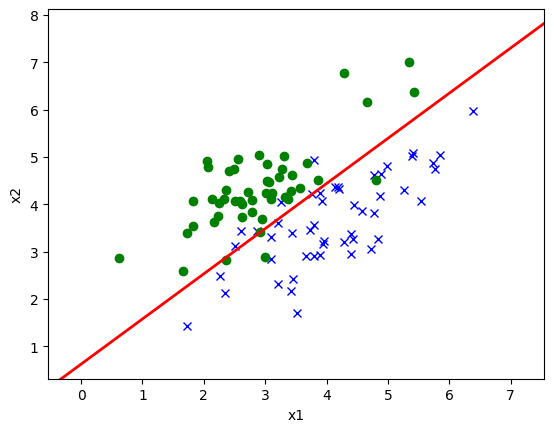

In [4]:
train_path_2 = "../data/ds2_train.csv"
valid_path_2 = "../data/ds2_valid.csv"

lr2 = LogisticRegression(train_path_2, valid_path_2)

eps = int(1e-5)
max_iter = int(1e6)

lr2.fit(eps, max_iter)
lr2.plot(True, True)